In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
advertising = pd.read_csv('advertising.csv')

In [4]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

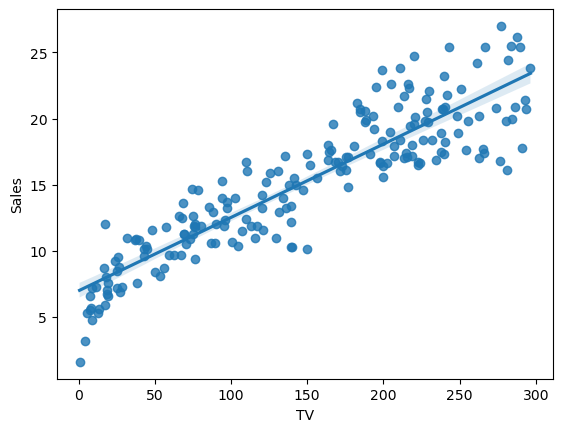

In [8]:
sns.regplot(x='TV', y='Sales', data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

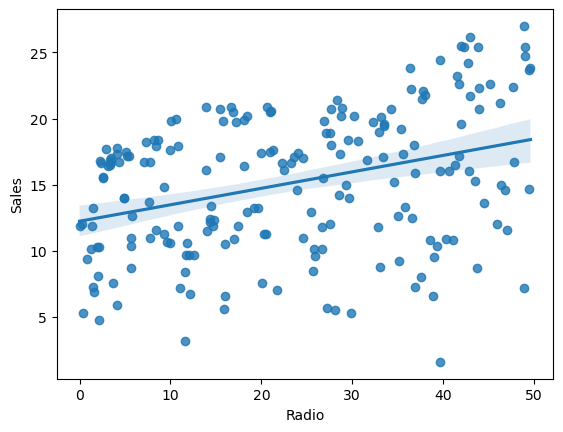

In [9]:
sns.regplot(x='Radio', y='Sales', data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

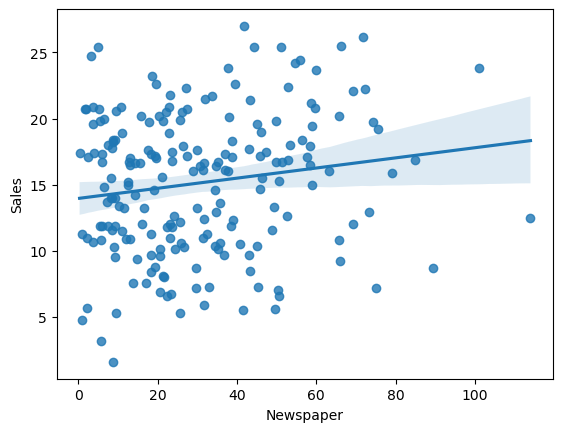

In [10]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

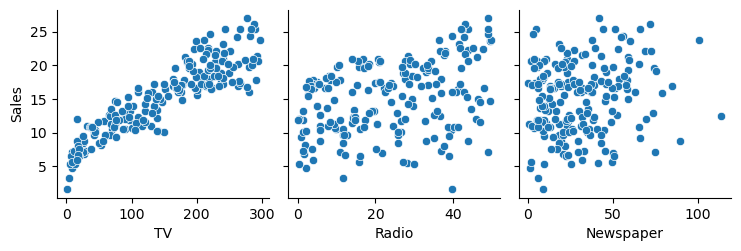

In [11]:
sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

In [12]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

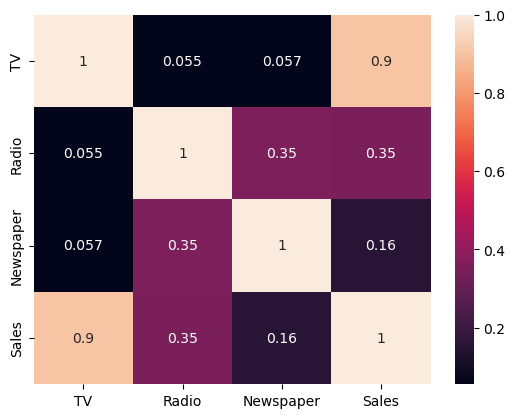

In [13]:
sns.heatmap(advertising.corr(), annot=True)

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [14]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [23]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [25]:
# fitting the model
# OLS - Ordinary least square
lr =sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()


In [26]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

# Sales = 6.94 + 0.05TV

In [28]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        21:08:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. visualizing how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

In [32]:
y_train_pred = lr_model.predict(X_train_sm)

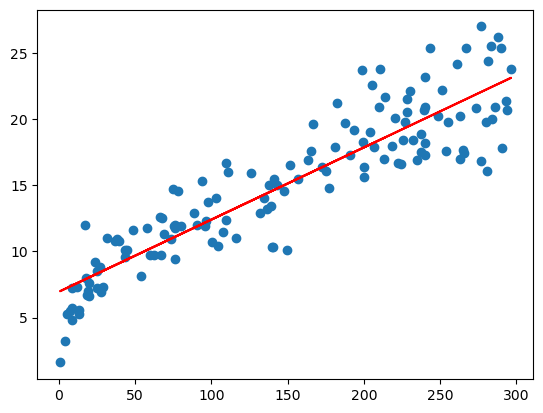

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

## Step 3 - Residual analysis

#error = funcation of (y_train , y_train_pred)

The assumption is error is normally distributed

In [37]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual plot')

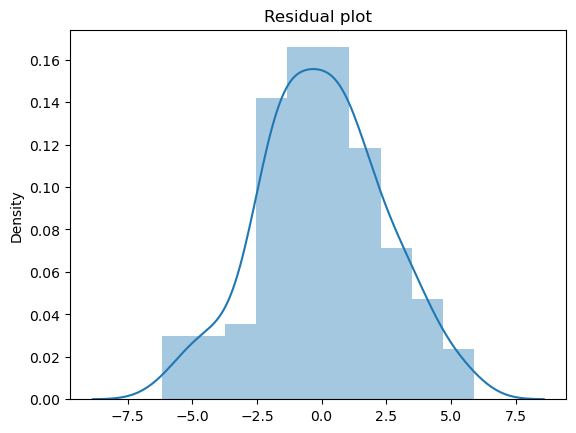

In [38]:
# plot the residuals

plt.figure()
sns.distplot(res)
plt.title('Residual plot')

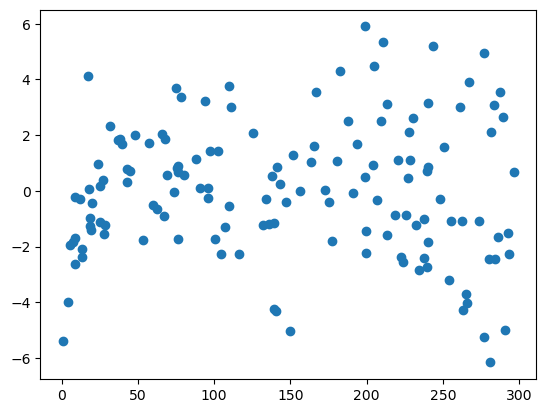

In [39]:
# look for patterns in residuals (we should not be able to identify)

plt.scatter(X_train , res)

## Step 4 : Prediction and Evaluation on Test Set

In [ ]:
# predictions on the test set (y_test_pred)
# Evaluate the model, r-squared on the test

In [43]:
# add the cons/intercept to the test set
X_test_sm = sm.add_constant(X_test)

# pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [48]:
#evaluate the model, r-squARED ON THE TEST
#r-squared
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)

In [49]:
r2

0.7921031601245658

In [50]:
# r2 on train set

r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)

In [51]:
r2_train

0.8157933136480389

In [53]:
# mean squred error

mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

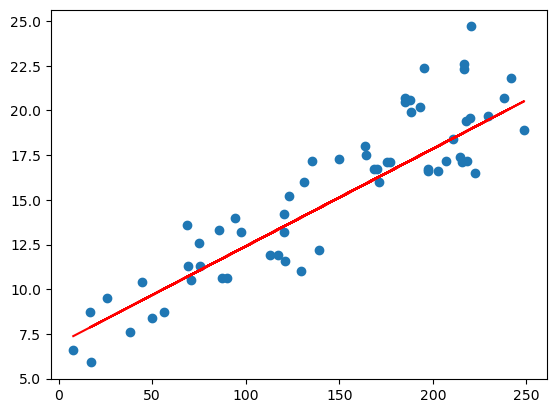

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

# LR using sklearn

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
#steps

#create an object of linear regresssion
lm = LinearRegression()

# fit the model
lm.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
#reshapin X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [66]:
#steps

# 1 create an object of linear regresssion
lm = LinearRegression()

#2 fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [68]:
# 3 see the param, make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [69]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [70]:
# 4 evaluate model

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662
